### Selenium을 이용한 이미지 크롤링
- 유투브 영상을 이미지로 크롤링
- 특정영역(Element)을 자르기
    - pillow : python을 이용해서 이미지를 전처리해주는 대표적인 패키지
    - conda install -c anaconda pillow
    - pip install pillow
- 유투브 영상 데이터를 다운로드
- fake_useragent 사용법
- headless 설정
    - 브라우저를 화면에 띄우지 않고 RAM영역에만 띄어서 사용하는 방법
    - 서버에서 selenium을 이용해서 크롤링할때 사용

In [1]:
import requests
import pandas as pd
import time
from selenium import webdriver
from PIL import Image as pil

#### 1. 이미지 스크린샷

In [5]:
!mkdir datas

In [14]:
url = 'https://www.youtube.com/watch?v=cVEemOmHw9Y&list=PLHFlHpPjgk71o1euNoaE17nV8OBzo3iEg&index=9&t=101s'
driver = webdriver.Chrome()
driver.get(url)

In [15]:
driver.save_screenshot('datas/screenshot.png')
driver.quit()

In [16]:
!ls datas

screenshot.png


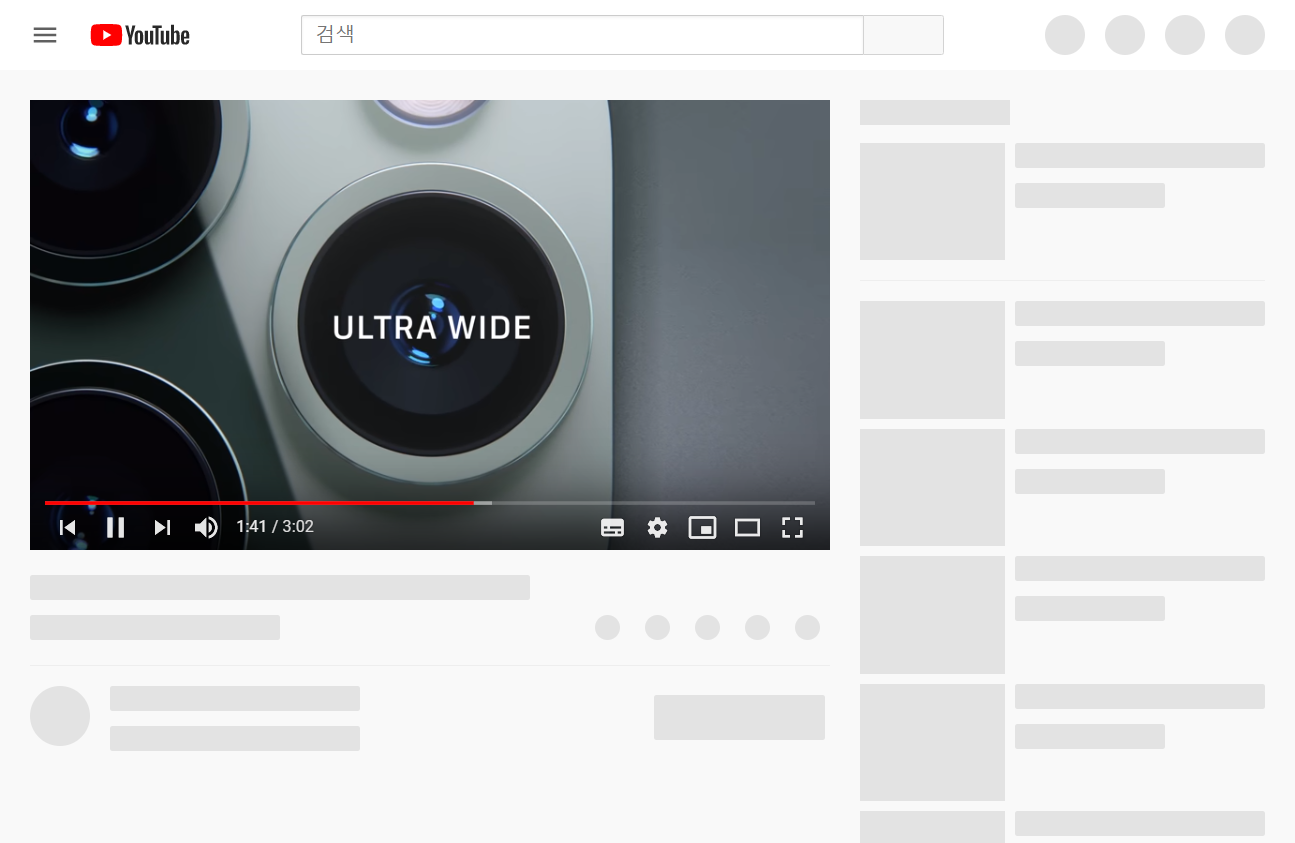

In [17]:
pil_img = pil.open('datas/screenshot.png')
pil_img

#### 2. 특정 영역의 엘리먼트 좌표값 구하기

In [124]:
driver = webdriver.Chrome()
driver.get(url)

In [125]:
element = driver.find_element_by_css_selector('#movie_player')
location = element.location
size = element.size
print(location, size)
driver.quit()

{'x': 24, 'y': 80} {'height': 360, 'width': 640}


In [222]:
# area 변경 : 해상도에 따라서 비율이 달라지기 때문에, 비율을 맞춰줘야 함.
left = location['x'] * 2
top = location['y'] * 2.381
right = left + size['width'] * 1.22
bottom = top +size['height']
area = (left, top, right, bottom)
area

(48, 190.48, 828.8, 550.48)

#### 3. 이미지를 pillow로 잘라주기

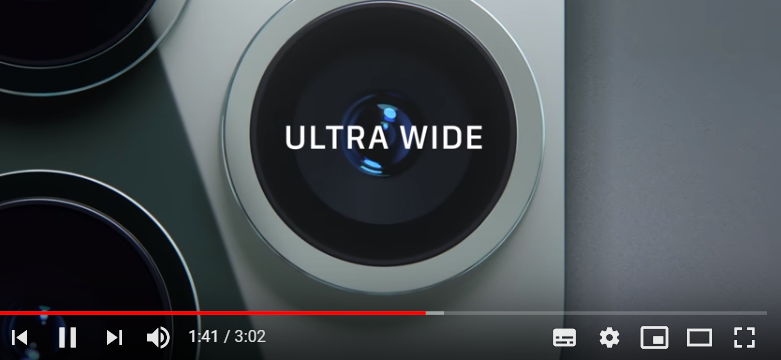

In [223]:
pil_element_img = pil_img.crop(area)
pil_element_img

In [224]:
# 이미지 저장
pil_element_img.save('datas/screenshot_element.png')

In [225]:
!ls datas

screenshot.png
screenshot_element.png


#### 썸네일 만들기
- 원본이미지를 다양한 사이즈로 축소하는 방법

In [226]:
pil_element_img.size

(781, 360)

(320, 147)


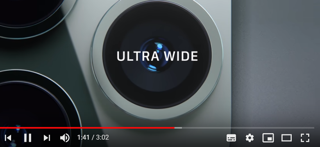

In [229]:
pil_element_img.thumbnail((320,160))
print(pil_element_img.size)
pil_element_img

### fake useragent

In [230]:
from fake_useragent import UserAgent

In [234]:
# 크롬 드라이버의 Agent 확인
driver = webdriver.Chrome()
agent = driver.execute_script('return navigator.userAgent;')
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36


In [235]:
UserAgent().chrome

'Mozilla/5.0 (X11; CrOS i686 3912.101.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'

In [268]:
# user agent 설정
# request의 헤더값 설정과 동일
options = webdriver.ChromeOptions()
options.add_argument(f'user-agent={UserAgent().chrome}')
driver = webdriver.Chrome(options=options)
# 바뀐 agent 확인 내용
agent = driver.execute_script('return navigator.userAgent;')
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36


#### Headless
- 브라우저를 화면에 띄우지 않고 메모리상에서만 실행하는 방법
- chrome 60 버전 이상에서만 사용이 가능
- window 화면이 지원되지 않는 환경에서 사용

In [269]:
options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome(options=options)
driver.get('https://www.fastcampus.co.kr/')
print(driver.title)
driver.quit()

패스트캠퍼스 - 커리어 성장을 위한 최고의 실무교육 아카데미


#### 유튜브 영상 파일 다운
- www. -> ss로 변경하면 다운로드 받을수 있는 사이트에 접속

In [289]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = f'datas/{title}', 0
    with open(save_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [290]:
url = 'https://www.youtube.com/watch?v=cVEemOmHw9Y&list=PLHFlHpPjgk71o1euNoaE17nV8OBzo3iEg&index=9'

In [291]:
link = 'https://r1---sn-ab5l6nzy.googlevideo.com/videoplayback?expire=1582780539&ei=G_xWXoCjC5jchgae3qFY&ip=209.197.30.177&id=o-AOMsCEqOE9V4RhmyQmAq6QtbywW6nhmQAA9jwOwi8CnZ&itag=22&source=youtube&requiressl=yes&mm=31%2C26&mn=sn-ab5l6nzy%2Csn-p5qlsndr&ms=au%2Conr&mv=m&mvi=0&pl=23&initcwndbps=1522500&vprv=1&mime=video%2Fmp4&ratebypass=yes&dur=182.044&lmt=1568144974157526&mt=1582758757&fvip=1&fexp=23842630%2C23878762&c=WEB&txp=5535432&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cvprv%2Cmime%2Cratebypass%2Cdur%2Clmt&sig=ALgxI2wwRQIhAOxnDpjrVhQ1jTOsmMbbtv0ovxWlvJJJdFBclAet-qToAiAWc4kMO7VZwWdVS6woG99UV9GX2fOhkLiuduNap4ZYQA%3D%3D&lsparams=mm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=AHylml4wRQIga1slarGtM8bHBcuJCuNddDojFQo5W3mozNnmif5pWRwCIQDWWNI7sgTetIbomXhjVYcRdCrdZqJ206SMfy4lpWfATg%3D%3D&contentlength=12899575&video_id=cVEemOmHw9Y&title=Introducing+iPhone+11+Pro+%E2%80%94+Apple'

In [292]:
title = 'Introducing iPhone 11 Pro_Apple.mp4'
size = download(title, link)
print(f"{round(size/1024/1024,2)}")

12.3
